In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
raw_data_path = os.path.join(os.path.pardir,'data','raw','auto_claims_fraud.txt')
raw_data_df = pd.read_csv(raw_data_path, delimiter= '\t', index_col=False)
df= raw_data_df

In [3]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
print('Mean Age : {0}'.format(df.Age.mean())) # mean
print('Median Age : {0}'.format(df.Age.median())) # median

Mean Age : 39.855706874189366
Median Age : 38.0


In [5]:
# Average age for the claims made is around 39 years.
#lets check if the claims were fraudulent or not

In [10]:
df.Sex.value_counts()

Male      13000
Female     2420
Name: Sex, dtype: int64

In [12]:
# categorical column : Proprotions
df.Sex.value_counts(normalize=True)

Male      0.843061
Female    0.156939
Name: Sex, dtype: float64

In [13]:
# this shows there are more number of claims made by men rather than females.

In [15]:
df.VehicleCategory.value_counts() # sedans and sport are more prone to accidents

Sedan      9671
Sport      5358
Utility     391
Name: VehicleCategory, dtype: int64

In [27]:
df.describe() # driver ratings std is 1.11 which implies that its normally disrtibuted

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


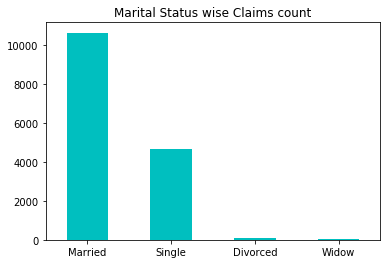

In [29]:
df.MaritalStatus.value_counts().plot(kind='bar',rot = 0, title='Marital Status wise Claims count', color='c')
# Divorced and Widowed people are less likely to file a claim

In [31]:
df.PastNumberOfClaims.value_counts()

2 to 4         5485
none           4352
1              3573
more than 4    2010
Name: PastNumberOfClaims, dtype: int64

In [ ]:
is_Fault =  df['FraudFound']=='Yes'
print(is_Fault.head())
df_Fault = df[is_Fault]
print(df_Fault.shape)


df_Fault_Past_Claims = df_Fault[df_Fault.PastNumberOfClaims != 'none']
df_Fault_Past_Claims.head()

In [21]:
df.DriverRating.value_counts() # they are almost same....means driver rating minimally effect the accidents claims

1    3944
3    3884
2    3801
4    3791
Name: DriverRating, dtype: int64

In [22]:
df.FraudFound.value_counts()

No     14497
Yes      923
Name: FraudFound, dtype: int64

In [23]:
df.groupby('FraudFound').Age.mean()

FraudFound
No     39.956957
Yes    38.265439
Name: Age, dtype: float64

In [24]:
df.groupby('Fault').DriverRating.mean()

Fault
Policy Holder    2.494835
Third Party      2.468974
Name: DriverRating, dtype: float64